<h1> Resolvable sources Plotter </h1> 

In the following, we'll implement a notebook to plot the distribution in redshift (together with its statistical uncertainties) of the resolvable sources for a _fiducial BBH_ population, together with the redshift distribution of resolvable sources coming from a _PBH_ subpopulation.  
First of all, we need to import some modules ! 

In [1]:
import numpy as np
import scipy.special as sc
import statistics as st
import random
import os
import IPython
import pandas as pd
import pickle
import multiprocessing as mp
from tqdm import tqdm
import scipy.stats as scst
from scipy import interpolate
from scipy.interpolate import interp1d
from scipy.integrate import quad
from scipy.stats import poisson
from scipy.special import gamma, hyp1f1
from multiprocessing import Pool, Manager, Value
from functools import partial
from LISAhdf5 import LISAhdf5,ParsUnits
%matplotlib inline
%run BigFont.py
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.style.use("seaborn-v0_8-whitegrid")

<h2> Loading the populations catalogues </h2> 

To begin, we can load the fiducial population catalogues as:

In [2]:
# Loading the aplus LIGO SNR Dataframes

df_key = 'LIGO'

LIGO1 = pd.read_hdf('LIGOResDistPoint1.h5', df_key)
LIGO2 = pd.read_hdf('LIGOResDistPoint2.h5', df_key)
LIGO3 = pd.read_hdf('LIGOResDistPoint3.h5', df_key)
LIGO4 = pd.read_hdf('LIGOResDistPoint4.h5', df_key)
LIGO5 = pd.read_hdf('LIGOResDistPoint5.h5', df_key)
LIGO6 = pd.read_hdf('LIGOResDistPoint6.h5', df_key)
LIGO7 = pd.read_hdf('LIGOResDistPoint7.h5', df_key)
LIGO8 = pd.read_hdf('LIGOResDistPoint8.h5', df_key)

# Loading the ET SNR Dataframes

df_key = 'ET'

ET1 = pd.read_hdf('ETResDistPoint1.h5', df_key)
ET2 = pd.read_hdf('ETResDistPoint2.h5', df_key)
ET3 = pd.read_hdf('ETResDistPoint3.h5', df_key)
ET4 = pd.read_hdf('ETResDistPoint4.h5', df_key)
ET5 = pd.read_hdf('ETResDistPoint5.h5', df_key)
ET6 = pd.read_hdf('ETResDistPoint6.h5', df_key)
ET7 = pd.read_hdf('ETResDistPoint7.h5', df_key)
ET8 = pd.read_hdf('ETResDistPoint8.h5', df_key)



the resulting datasets will appear as follows:

In [3]:
LIGO1

,Redshift,Fid_Res,Fid_ResNorm,Pert_Res,Pert_ResNorm
3,0.502517,16.883717,3353.426602,0.138319,27.472813
14,0.507577,16.777432,3299.096031,0.141727,27.868968
28,0.512689,16.682972,3247.817545,0.145209,28.269151
37,0.517851,16.730623,3224.623597,0.148750,28.669793
48,0.523066,16.679512,3182.723998,0.152356,29.071957
...,...,...,...,...,...
259,9.559270,0.000000,0.000000,0.000000,0.000000
270,9.655527,0.000000,0.000000,0.000000,0.000000
279,9.752754,0.000000,0.000000,0.000000,0.000000
286,9.850960,0.000000,0.000000,0.000000,0.000000


<h2> Plotting the redshift distribution of the resolvable sources </h2> 

Now that we have all the data, we can plot the resolvable sources distribution by running:

<h2> Plotting the results for aplus LIGO </h2>

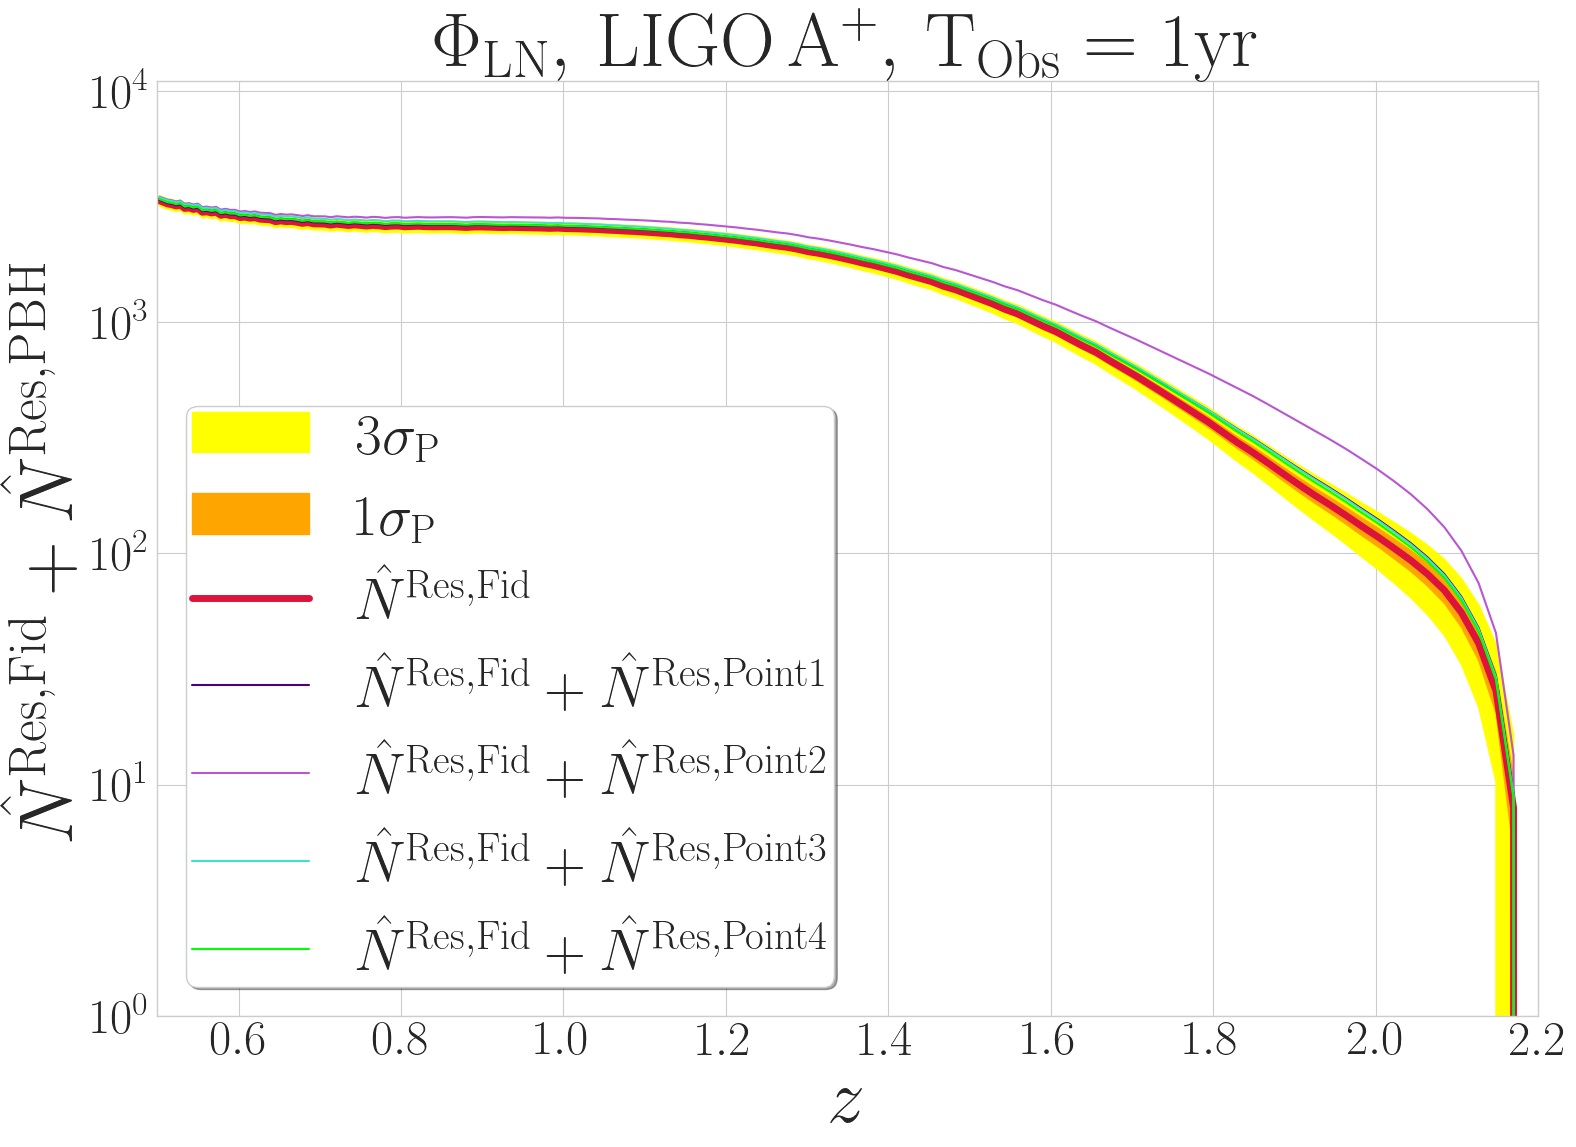

In [4]:
# Plotting the obtained statistics for the fiducial model

plt.figure(figsize=(16,12))
plt.fill_between(LIGO1.Redshift, LIGO1.Fid_ResNorm + 3.*np.sqrt(LIGO1.Fid_ResNorm), LIGO1.Fid_ResNorm - 3.*np.sqrt(LIGO1.Fid_ResNorm), color = 'yellow', label = r'$3\sigma_{\rm P}$')
plt.fill_between(LIGO1.Redshift, LIGO1.Fid_ResNorm + np.sqrt(LIGO1.Fid_ResNorm), LIGO1.Fid_ResNorm -np.sqrt(LIGO1.Fid_ResNorm), color = 'orange', label = r'$1\sigma_{\rm P}$')
plt.plot(LIGO1.Redshift, LIGO1.Fid_ResNorm, color = 'crimson', linewidth=5, label = r'$\hat{N}^{\rm Res, Fid}$')
plt.plot(LIGO1.Redshift, LIGO1.Fid_ResNorm + LIGO1.Pert_ResNorm, color = 'Indigo', label = r'$\hat{N}^{\rm Res, Fid} + \hat{N}^{\rm Res, Point 1}$')
plt.plot(LIGO2.Redshift, LIGO2.Fid_ResNorm + LIGO2.Pert_ResNorm, color = 'mediumorchid', label = r'$\hat{N}^{\rm Res, Fid} + \hat{N}^{\rm Res, Point 2}$')
plt.plot(LIGO3.Redshift, LIGO3.Fid_ResNorm + LIGO3.Pert_ResNorm, color = 'turquoise', label = r'$\hat{N}^{\rm Res, Fid} + \hat{N}^{\rm Res, Point 3}$')
plt.plot(LIGO4.Redshift, LIGO4.Fid_ResNorm + LIGO4.Pert_ResNorm, color = 'lime', label = r'$\hat{N}^{\rm Res, Fid} + \hat{N}^{\rm Res, Point 4}$')
plt.xlabel('$z$', fontsize = 55 )
plt.xlim(0.5, 2.2)
plt.ylim(1.e0, 1.1e4)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc = 3, frameon = True, fancybox = True, shadow = True, borderpad= 0.1, prop={'size': 42})
plt.ylabel(r'$\hat{N}^{\rm Res, Fid} + \hat{N}^{\rm Res, PBH}$', fontsize = 55)
plt.title(r'$\Phi_{\rm LN}, \, \rm LIGO \, A^{+}, \, T_{\rm Obs} = 1yr$',fontsize = 55)
plt.tight_layout()
plt.savefig('apLIGOSNRB8ResDistLN.png',dpi=200)
#plt.savefig('apLIGOSNRB8ResDistLN.png',dpi=50)

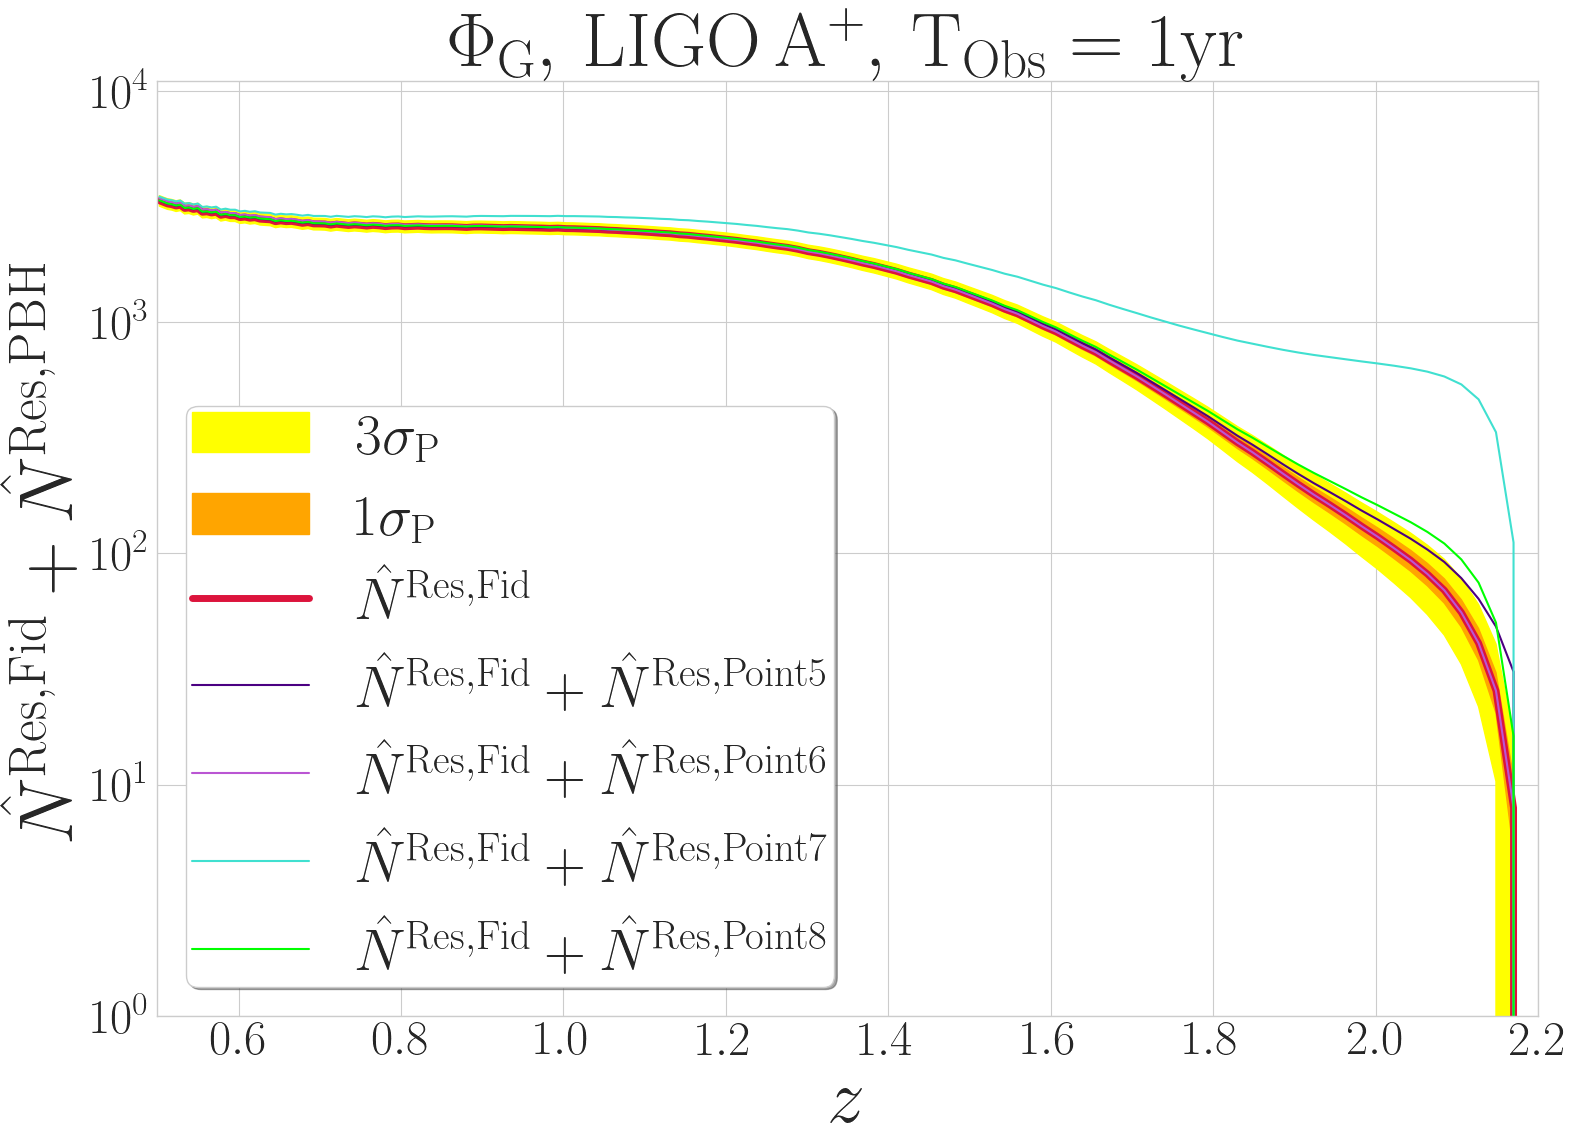

In [5]:
# Plotting the obtained statistics for the fiducial model

plt.figure(figsize=(16,12))
plt.fill_between(LIGO5.Redshift, LIGO5.Fid_ResNorm + 3.*np.sqrt(LIGO5.Fid_ResNorm), LIGO5.Fid_ResNorm - 3.*np.sqrt(LIGO5.Fid_ResNorm), color = 'yellow', label = r'$3\sigma_{\rm P}$')
plt.fill_between(LIGO5.Redshift, LIGO5.Fid_ResNorm + np.sqrt(LIGO5.Fid_ResNorm), LIGO5.Fid_ResNorm -np.sqrt(LIGO5.Fid_ResNorm), color = 'orange', label = r'$1\sigma_{\rm P}$')
plt.plot(LIGO5.Redshift, LIGO5.Fid_ResNorm, color = 'crimson', linewidth=5, label = r'$\hat{N}^{\rm Res, Fid}$')
plt.plot(LIGO5.Redshift, LIGO5.Fid_ResNorm + LIGO5.Pert_ResNorm, color = 'Indigo', label = r'$\hat{N}^{\rm Res, Fid} + \hat{N}^{\rm Res, Point 5}$')
plt.plot(LIGO6.Redshift, LIGO6.Fid_ResNorm + LIGO6.Pert_ResNorm, color = 'mediumorchid', label = r'$\hat{N}^{\rm Res, Fid} + \hat{N}^{\rm Res, Point 6}$')
plt.plot(LIGO7.Redshift, LIGO7.Fid_ResNorm + LIGO7.Pert_ResNorm, color = 'turquoise', label = r'$\hat{N}^{\rm Res, Fid} + \hat{N}^{\rm Res, Point 7}$')
plt.plot(LIGO8.Redshift, LIGO8.Fid_ResNorm + LIGO8.Pert_ResNorm, color = 'lime', label = r'$\hat{N}^{\rm Res, Fid} + \hat{N}^{\rm Res, Point 8}$')
plt.xlabel('$z$', fontsize = 55 )
plt.xlim(0.5, 2.2)
plt.ylim(1.e0, 1.1e4)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc = 3, frameon = True, fancybox = True, shadow = True, borderpad= 0.1, prop={'size': 42})
plt.ylabel(r'$\hat{N}^{\rm Res, Fid} + \hat{N}^{\rm Res, PBH}$', fontsize = 55)
plt.title(r'$\Phi_{\rm G}, \, \rm LIGO \, A^{+}, \, T_{\rm Obs} = 1yr$',fontsize = 55)
plt.tight_layout()
plt.savefig('apLIGOSNRB8ResDistGs.png',dpi=200)
#plt.savefig('apLIGOSNRB8ResDistGs.png',dpi=50)

<h2> Plotting the results for ET </h2>

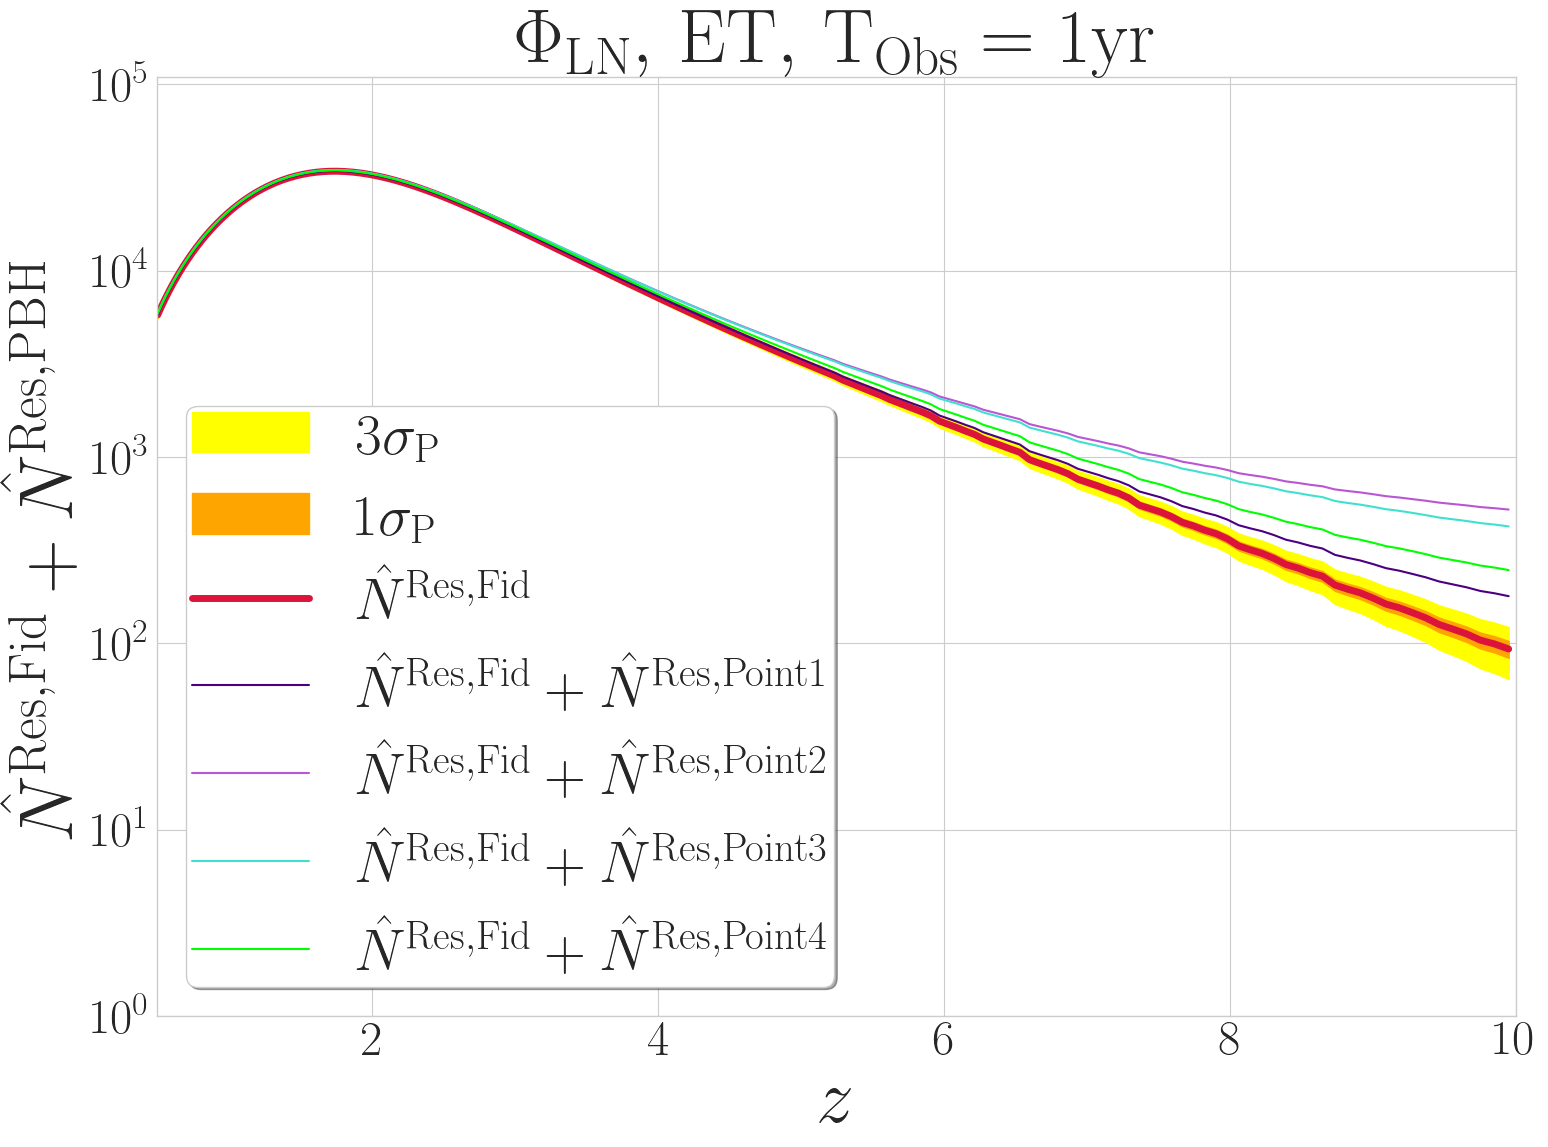

In [6]:
# Plotting the obtained statistics for the fiducial model

plt.figure(figsize=(16,12))
plt.fill_between(ET1.Redshift, ET1.Fid_ResNorm + 3.*np.sqrt(ET1.Fid_ResNorm), ET1.Fid_ResNorm - 3.*np.sqrt(ET1.Fid_ResNorm), color = 'yellow', label = r'$3\sigma_{\rm P}$')
plt.fill_between(ET1.Redshift, ET1.Fid_ResNorm + np.sqrt(ET1.Fid_ResNorm), ET1.Fid_ResNorm -np.sqrt(ET1.Fid_ResNorm), color = 'orange', label = r'$1\sigma_{\rm P}$')
plt.plot(ET1.Redshift, ET1.Fid_ResNorm, color = 'crimson', linewidth=5, label = r'$\hat{N}^{\rm Res, Fid}$')
plt.plot(ET1.Redshift, ET1.Fid_ResNorm + ET1.Pert_ResNorm, color = 'Indigo', label = r'$\hat{N}^{\rm Res, Fid} + \hat{N}^{\rm Res, Point 1}$')
plt.plot(ET2.Redshift, ET2.Fid_ResNorm + ET2.Pert_ResNorm, color = 'mediumorchid', label = r'$\hat{N}^{\rm Res, Fid} + \hat{N}^{\rm Res, Point 2}$')
plt.plot(ET3.Redshift, ET3.Fid_ResNorm + ET3.Pert_ResNorm, color = 'turquoise', label = r'$\hat{N}^{\rm Res, Fid} + \hat{N}^{\rm Res, Point 3}$')
plt.plot(ET4.Redshift, ET4.Fid_ResNorm + ET4.Pert_ResNorm, color = 'lime', label = r'$\hat{N}^{\rm Res, Fid} + \hat{N}^{\rm Res, Point 4}$')
plt.xlabel('$z$', fontsize = 55 )
plt.xlim(0.5, 10.)
plt.ylim(1.e0, 1.1e5)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc = 3, frameon = True, fancybox = True, shadow = True, borderpad= 0.1, prop={'size': 42})
plt.ylabel(r'$\hat{N}^{\rm Res, Fid} + \hat{N}^{\rm Res, PBH}$', fontsize = 55)
plt.title(r'$\Phi_{\rm LN}, \, \rm ET, \, T_{\rm Obs} = 1yr$',fontsize = 55)
plt.tight_layout()
plt.savefig('ETSNRB8ResDistLN.png',dpi=200)
#plt.savefig('ETSNRB8ResDistLN.png',dpi=50)

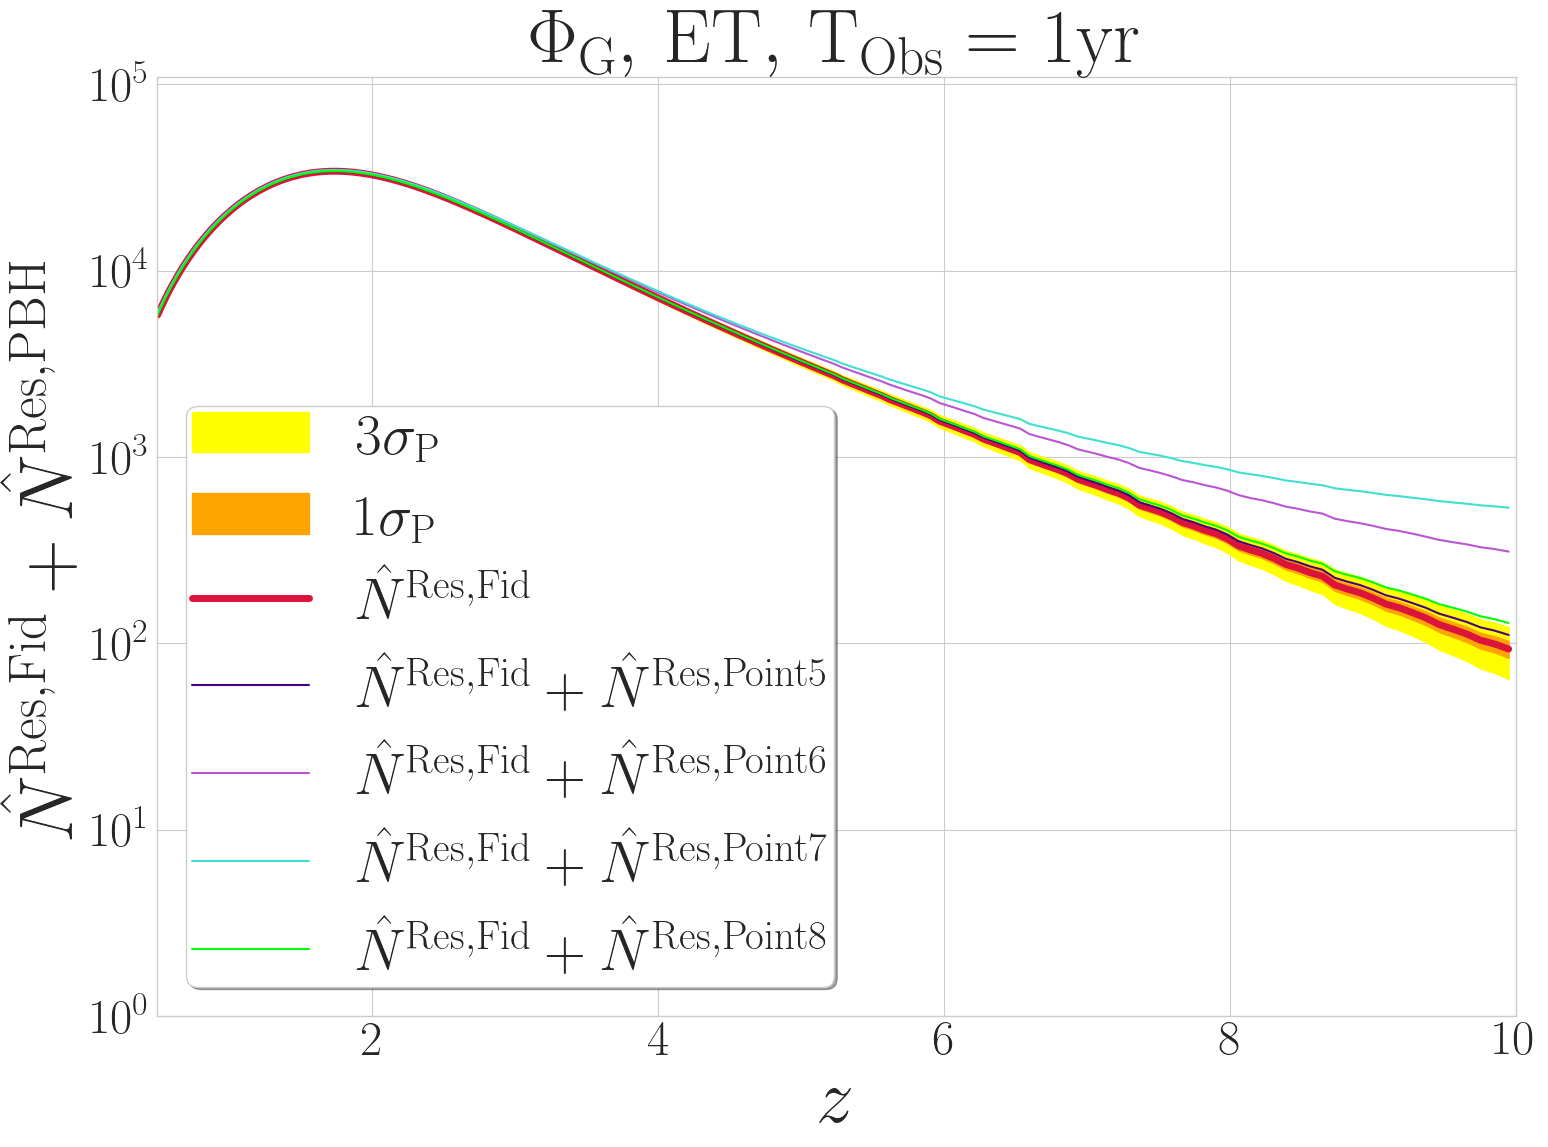

In [7]:
# Plotting the obtained statistics for the fiducial model

plt.figure(figsize=(16,12))
plt.fill_between(ET5.Redshift, ET5.Fid_ResNorm + 3.*np.sqrt(ET5.Fid_ResNorm), ET5.Fid_ResNorm - 3.*np.sqrt(ET5.Fid_ResNorm), color = 'yellow', label = r'$3\sigma_{\rm P}$')
plt.fill_between(ET5.Redshift, ET5.Fid_ResNorm + np.sqrt(ET5.Fid_ResNorm), ET5.Fid_ResNorm -np.sqrt(ET5.Fid_ResNorm), color = 'orange', label = r'$1\sigma_{\rm P}$')
plt.plot(ET5.Redshift, ET5.Fid_ResNorm, color = 'crimson', linewidth=5, label = r'$\hat{N}^{\rm Res, Fid}$')
plt.plot(ET5.Redshift, ET5.Fid_ResNorm + ET5.Pert_ResNorm, color = 'Indigo', label = r'$\hat{N}^{\rm Res, Fid} + \hat{N}^{\rm Res, Point 5}$')
plt.plot(ET6.Redshift, ET6.Fid_ResNorm + ET6.Pert_ResNorm, color = 'mediumorchid', label = r'$\hat{N}^{\rm Res, Fid} + \hat{N}^{\rm Res, Point 6}$')
plt.plot(ET7.Redshift, ET7.Fid_ResNorm + ET7.Pert_ResNorm, color = 'turquoise', label = r'$\hat{N}^{\rm Res, Fid} + \hat{N}^{\rm Res, Point 7}$')
plt.plot(ET8.Redshift, ET8.Fid_ResNorm + ET8.Pert_ResNorm, color = 'lime', label = r'$\hat{N}^{\rm Res, Fid} + \hat{N}^{\rm Res, Point 8}$')
plt.xlabel('$z$', fontsize = 55 )
plt.xlim(0.5, 10.)
plt.ylim(1.e0, 1.1e5)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc = 3, frameon = True, fancybox = True, shadow = True, borderpad= 0.1, prop={'size': 42})
plt.ylabel(r'$\hat{N}^{\rm Res, Fid} + \hat{N}^{\rm Res, PBH}$', fontsize = 55)
plt.title(r'$\Phi_{\rm G}, \, \rm ET, \, T_{\rm Obs} = 1yr$',fontsize = 55)
plt.tight_layout()
plt.savefig('ETSNRB8ResDistGs.png',dpi=200)
#plt.savefig('ETSNRB8ResDistGs.png',dpi=50)